<a href="https://colab.research.google.com/github/satria-siregar/PSDS-2.0-Kelas-Mahir/blob/main/Naive_Bayes_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd                           
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
#Membuka Dataset
df = pd.read_csv('https://raw.githubusercontent.com/satria-siregar/PSDS-2.0-Kelas-Mahir/main/KNN%20and%20Naive%20Bayes/heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


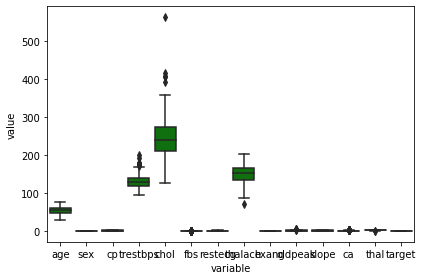

In [3]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

##**Data Preproccesing**

In [4]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [5]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


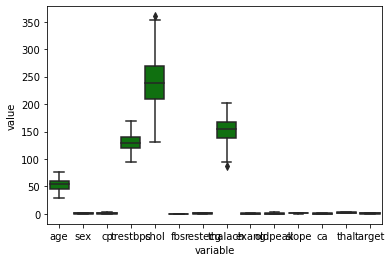

In [6]:
#Cek Ulang Outlier
sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df_clear))

plt.show()

##**Normalisasi Data**

In [7]:
#Normalisasi data dengan MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.170213,1.0,0.666667,0.473684,0.519651,0.0,0.5,0.868421,0.0,0.875,0.0,0.0,0.5,1.0
1,0.255319,0.0,0.333333,0.473684,0.318777,0.0,0.0,0.736842,0.0,0.350,1.0,0.0,0.5,1.0
2,0.574468,1.0,0.333333,0.342105,0.458515,0.0,0.5,0.789474,0.0,0.200,1.0,0.0,0.5,1.0
3,0.595745,0.0,0.000000,0.342105,0.973799,0.0,0.5,0.657895,1.0,0.150,1.0,0.0,0.5,1.0
4,0.595745,1.0,0.000000,0.605263,0.266376,0.0,0.5,0.526316,0.0,0.100,0.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.723404,0.0,0.000000,0.394737,0.288210,0.0,0.5,0.421053,1.0,0.000,0.5,0.0,0.5,0.0
224,0.595745,0.0,0.000000,0.605263,0.480349,0.0,0.5,0.307018,1.0,0.050,0.5,0.0,1.0,0.0
225,0.340426,1.0,1.000000,0.210526,0.580786,0.0,0.5,0.385965,0.0,0.300,0.5,0.0,1.0,0.0
226,0.595745,1.0,0.000000,0.473684,0.000000,0.0,0.5,0.236842,1.0,0.300,0.5,0.5,1.0,0.0


In [8]:
y=df_norm['target']
X=df_norm.drop(columns=['target'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

In [9]:
# Membagi data menjadi data latih dan data uji
#X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=1234)
#X_uji

In [10]:
#Membagi dataset menjadi data tes dan data training
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=1234)

In [11]:
def akurasi(y_asli, y_pred):
    akr = np.sum(y_asli == y_pred) / len(y_asli)
    return akr

In [12]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_latih, y_latih)

# Menentukan hasil prediksi dari x_test
prediksi_1 = nbtrain.predict(X_uji)

print("Akurasi Klasifikasi Naive Bayes", akurasi(y_uji, prediksi_1)*100, "%")
print(prediksi_1)
print(y_uji)

Akurasi Klasifikasi Naive Bayes 86.95652173913044 %
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.]


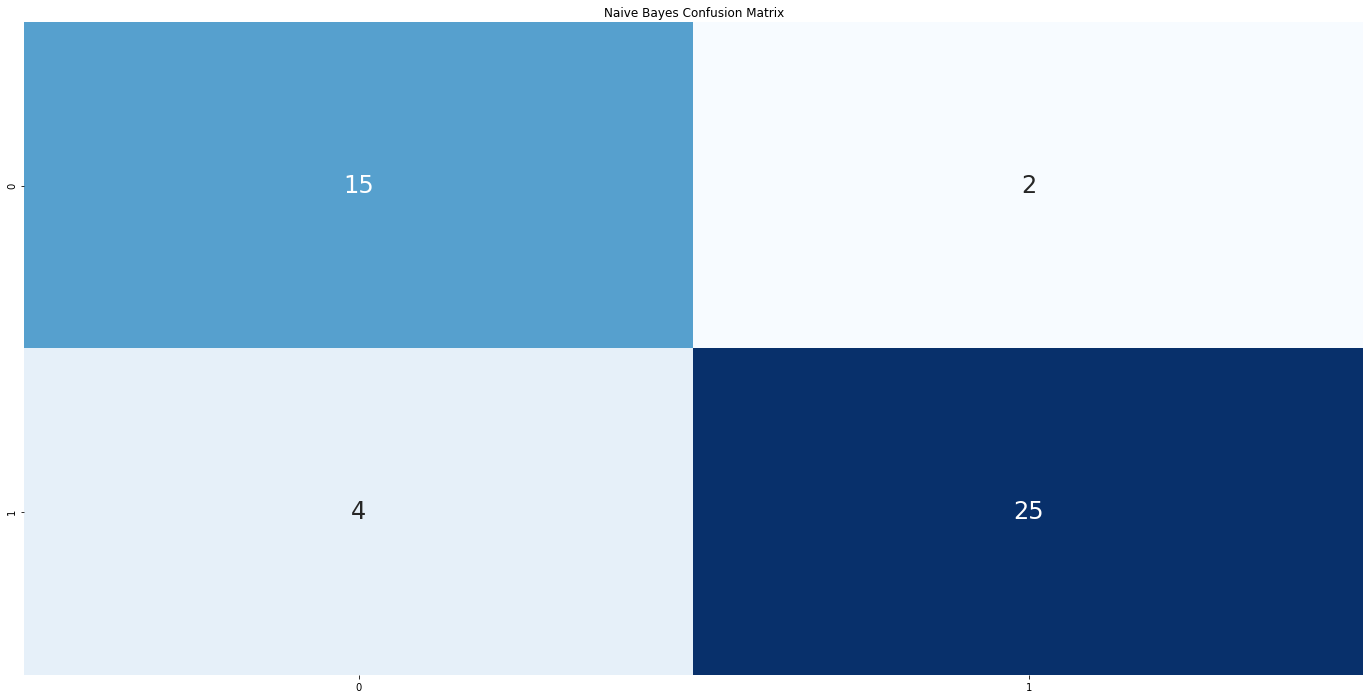

In [13]:
y_head_nb = prediksi_1
cm_nb = confusion_matrix(y_uji,y_head_nb)
plt.figure(figsize=(24,12))
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})